In [28]:
import sys

import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from transformers import AutoTokenizer
from torch.utils.data import DataLoader

sys.path.append("../")
from src import (
    create_hf_dataset,
    ImageTextSDTensorDataset,
    ImageTextSDXLTensorDataset,
    ImageTextDataset,
    RandomCropWithCoords,
    CenterCropWithCoords,
    ComposeWithCropCoords,
    Params,
    denormalize_batch,
    show_tensor_images,
)

In [29]:
data_dir = "../data/deep_fashion"

In [30]:
config_path = "../configs/train_config_sdxl.json"
config = Params(config_path)

In [31]:
hf_dataset = create_hf_dataset(data_dir, config.TRAINING.TEST_SIZE)

# Look at Prepared Data for Stable Diffusion

In [32]:
sd_train_config_path = "./configs_for_exploration/train_config_sd.json"
sd_train_config = Params(sd_train_config_path)

In [33]:
sd_tokenizer = AutoTokenizer.from_pretrained(sd_train_config.MODEL.BASE_MODEL_NAME, subfolder="tokenizer")

In [34]:
def visualize_sd_tensor_examples(data_batch):
    images, input_ids = data_batch
    denorm_images = denormalize_batch(images, [0.5], [0.5])
    
    example_indices = np.random.randint(0, len(images), 2)

    dash_line = "-".join(" " for _ in range(100))

    for i, index in enumerate(example_indices):
        input_id = input_ids[index]
        text = sd_tokenizer.decode(input_id, skip_special_tokens=True)
        image = denorm_images[index]
        
        print(dash_line)
        print("Example", i+1)
        print(dash_line)
        print(f"IMAGE:\n")
        show_tensor_images(image.unsqueeze(0), num=1)
        print(dash_line)
        print(f"TEXT:\n{text}")
        print(dash_line)
        print(f"INPUT ID:\n{input_id}")
        print(dash_line)

**Look at Train Data**

In [35]:
sd_train_transforms = transforms.Compose(
    [
        transforms.Resize(sd_train_config.DATA_AUGMENTATION.RESIZE_RESOLUTION),
        transforms.RandomCrop(sd_train_config.DATA_AUGMENTATION.TARGET_RESOLUTION),
        transforms.RandomHorizontalFlip() if sd_train_config.DATA_AUGMENTATION.RANDOM_HORIZONTAL_FLIP else transforms.Lambda(lambda x: x),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5]),
    ]
)
sd_train_dataset = ImageTextSDTensorDataset(hf_dataset["train"], sd_tokenizer, sd_train_transforms, split="train")
sd_train_dataloader = DataLoader(sd_train_dataset, batch_size=sd_train_config.TRAINING.BATCH_SIZE.TRAIN, shuffle=True)

Map: 100%|██████████| 40416/40416 [00:02<00:00, 19172.19 examples/s]


In [36]:
sd_train_batch = next(iter(sd_train_dataloader))

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Example 1
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
IMAGE:



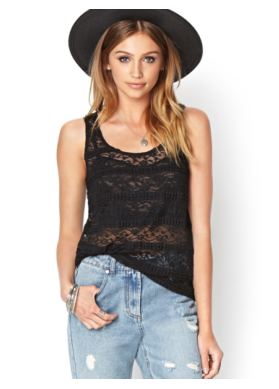

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
TEXT:
this female is wearing a tank tank shirt with graphic patterns. the tank shirt is with cotton fabric. the neckline of the tank shirt is crew. there is an accessory on her wrist. there is an accessory in his her neck. there is a ring on her finger. the person has a hat in her head.
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
INPUT ID:
tensor([49406,   589,  3970,   533,  3309,   320,  6172,  6172,  2523,   593,
         4245, 11637,   269,   518,  6172,  2523,   533,   593,  7050, 10033,
          269,   518,  6066,  1148,   539,   518,  6172,  2523,   533,  3462,
          269,   997,   533,   550, 20417,   525,   899, 16139,   26

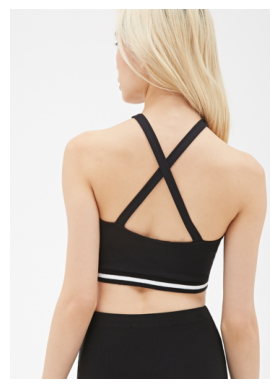

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
TEXT:
her tank top has sleeves cut off, cotton fabric and solid color patterns.
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
INPUT ID:
tensor([49406,   899,  6172,  1253,   791, 19691,  3032,  1007,   267,  7050,
        10033,   537,  6148,  3140, 11637,   269, 49407, 49407, 49407, 49407,
        49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
        49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
        49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
        49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
        49407, 49407, 49407, 49407, 49407,

In [37]:
visualize_sd_tensor_examples(sd_train_batch)

**Look at Validation data**

In [38]:
sd_val_transforms = transforms.Compose(
    [
        transforms.Resize(min(sd_train_config.DATA_AUGMENTATION.TARGET_RESOLUTION)),
        transforms.CenterCrop(sd_train_config.DATA_AUGMENTATION.TARGET_RESOLUTION),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5]),
    ]
)
sd_val_dataset = ImageTextSDTensorDataset(hf_dataset["validation"], sd_tokenizer, sd_val_transforms, split="validation")
sd_val_dataloader = DataLoader(sd_val_dataset, batch_size=sd_train_config.TRAINING.BATCH_SIZE.TRAIN, shuffle=False)

Map: 100%|██████████| 2128/2128 [00:00<00:00, 21819.01 examples/s]


In [39]:
sd_val_batch = next(iter(sd_val_dataloader))

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Example 1
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
IMAGE:



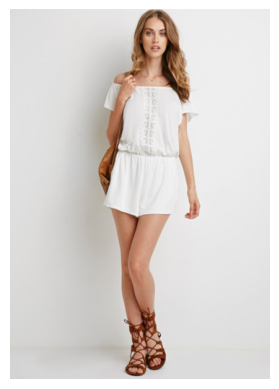

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
TEXT:
the lady wears a short - sleeve t - shirt with graphic patterns and three - point shorts. the t - shirt is with cotton fabric. the shorts are with cotton fabric and solid color patterns. this female is wearing a ring on her finger. this lady has neckwear.
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
INPUT ID:
tensor([49406,   518,  2909, 11869,   320,  3005,   268, 10536,   339,   268,
         2523,   593,  4245, 11637,   537,  2097,   268,  2301,  9680,   269,
          518,   339,   268,  2523,   533,   593,  7050, 10033,   269,   518,
         9680,   631,   593,  7050, 10033,   537,  6148,  3140, 11637,   269,
          589,  

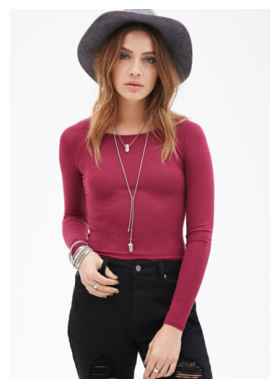

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
TEXT:
her shirt has long sleeves, cotton fabric and solid color patterns. the neckline of it is crew. this woman has neckwear. there is a ring on her finger. the lady is wearing a hat. there is an accessory on her wrist.
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
INPUT ID:
tensor([49406,   899,  2523,   791,  1538, 19691,   267,  7050, 10033,   537,
         6148,  3140, 11637,   269,   518,  6066,  1148,   539,   585,   533,
         3462,   269,   589,  2308,   791,  6066,  2839,   269,   997,   533,
          320,  2540,   525,   899,  8895,   269,   518,  2909,   533,  3309,
          320,  3801,   269,   997,   533,   550, 20417, 

In [40]:
visualize_sd_tensor_examples(sd_val_batch)

# Look at Prepared Data for Stable Diffusion XL

In [41]:
sdxl_train_config_path = "./configs_for_exploration/train_config_sdxl.json"
sdxl_train_config = Params(sdxl_train_config_path)

In [42]:
sdxl_tokenizer1 = AutoTokenizer.from_pretrained(sdxl_train_config.MODEL.BASE_MODEL_NAME, subfolder="tokenizer")
sdxl_tokenizer2 = AutoTokenizer.from_pretrained(sdxl_train_config.MODEL.BASE_MODEL_NAME, subfolder="tokenizer_2")

In [43]:
def visualize_sdxl_tensor_examples(data_batch):
    images, input_ids1, input_ids2, add_time_ids = data_batch
    denorm_images = denormalize_batch(images, [0.5], [0.5])
    
    example_indices = np.random.randint(0, len(images), 2)

    dash_line = "-".join(" " for _ in range(100))

    for i, index in enumerate(example_indices):
        input_id1 = input_ids1[index]
        input_id2 = input_ids2[index]
        add_time_id = add_time_ids[index]
        text1 = sdxl_tokenizer1.decode(input_id1, skip_special_tokens=True)
        text2 = sdxl_tokenizer2.decode(input_id2, skip_special_tokens=True)
        image = denorm_images[index]
        
        print(dash_line)
        print("Example", i+1)
        print(dash_line)
        print(f"IMAGE:\n")
        show_tensor_images(image.unsqueeze(0), num=1)
        print(dash_line)
        print(f"TEXT1:\n{text1}")
        print(dash_line)
        print(f"TEXT2:\n{text2}")
        print(dash_line)
        print(f"INPUT ID1:\n{input_id1}")
        print(dash_line)
        print(f"INPUT ID2:\n{input_id2}")
        print(dash_line)
        print(f"ADD TIME ID:\n{add_time_id}")
        print(dash_line)

**Look at Train Data**

In [44]:
sdxl_train_transforms = ComposeWithCropCoords(
    [
        transforms.Resize(sdxl_train_config.DATA_AUGMENTATION.RESIZE_RESOLUTION),
        RandomCropWithCoords(sdxl_train_config.DATA_AUGMENTATION.TARGET_RESOLUTION),
        transforms.RandomHorizontalFlip() if sdxl_train_config.DATA_AUGMENTATION.RANDOM_HORIZONTAL_FLIP else transforms.Lambda(lambda x: x),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5]),
    ]
)
sdxl_train_dataset = ImageTextSDXLTensorDataset(hf_dataset["train"], sdxl_tokenizer1, sdxl_tokenizer2, sdxl_train_transforms, sdxl_train_config.DATA_AUGMENTATION.TARGET_RESOLUTION, split="train")
sdxl_train_dataloader = DataLoader(sdxl_train_dataset, batch_size=sdxl_train_config.TRAINING.BATCH_SIZE.TRAIN, shuffle=True)

Map: 100%|██████████| 40416/40416 [00:03<00:00, 10556.13 examples/s]


In [45]:
sdxl_train_batch = next(iter(sdxl_train_dataloader))

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Example 1
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
IMAGE:



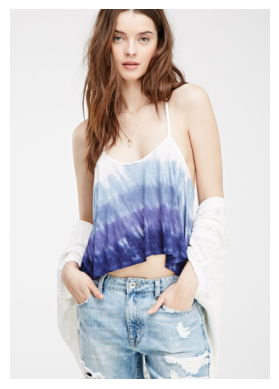

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
TEXT1:
the sweater this lady wears has long sleeves and it is with cotton fabric and other patterns. the neckline of the sweater is suspenders. this woman has neckwear.
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
TEXT2:
the sweater this lady wears has long sleeves and it is with cotton fabric and other patterns. the neckline of the sweater is suspenders. this woman has neckwear.
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
INPUT ID1:
tensor([49406,   518, 11455,   589,  2909, 11869,  

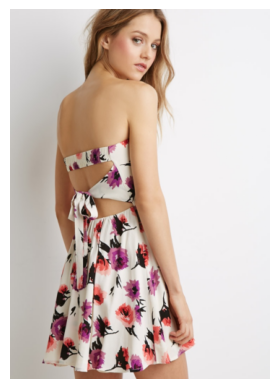

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
TEXT1:
the upper clothing has no sleeves, cotton fabric and floral patterns. the lower clothing is of three - point length. the fabric is cotton and it has floral patterns.
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
TEXT2:
the upper clothing has no sleeves, cotton fabric and floral patterns. the lower clothing is of three - point length. the fabric is cotton and it has floral patterns.
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
INPUT ID1:
tensor([49406,   518,  7067,  7425,   791, 

In [46]:
visualize_sdxl_tensor_examples(sdxl_train_batch)

**Look at Validation data**

In [47]:
sdxl_val_transforms = ComposeWithCropCoords(
    [
        transforms.Resize(min(sdxl_train_config.DATA_AUGMENTATION.TARGET_RESOLUTION)),
        CenterCropWithCoords(sdxl_train_config.DATA_AUGMENTATION.TARGET_RESOLUTION),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5]),
    ]
)
sdxl_val_dataset = ImageTextSDXLTensorDataset(hf_dataset["validation"], sdxl_tokenizer1, sdxl_tokenizer2, sdxl_val_transforms, sdxl_train_config.DATA_AUGMENTATION.TARGET_RESOLUTION, split="validation")
sdxl_val_dataloader = DataLoader(sdxl_val_dataset, batch_size=sdxl_train_config.TRAINING.BATCH_SIZE.TEST, shuffle=False)

Map: 100%|██████████| 2128/2128 [00:00<00:00, 11333.09 examples/s]


In [48]:
sdxl_val_batch = next(iter(sdxl_val_dataloader))

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Example 1
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
IMAGE:



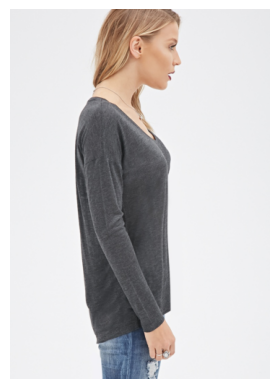

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
TEXT1:
the shirt the person wears has long sleeves and its fabric is cotton. the pattern of it is solid color. it has a v - shape neckline. this female wears a ring. the person has neckwear.
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
TEXT2:
the shirt the person wears has long sleeves and its fabric is cotton. the pattern of it is solid color. it has a v - shape neckline. this female wears a ring. the person has neckwear.
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
INPUT ID1:
tensor(

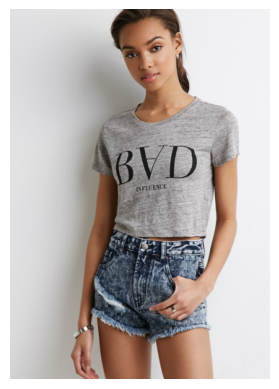

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
TEXT1:
this female wears a short - sleeve t - shirt with graphic patterns. the t - shirt is with cotton fabric. it has a round neckline. this female wears a three - point pants. the pants are with denim fabric and solid color patterns. this lady is wearing a ring on her finger. there is an accessory on her wrist.
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
TEXT2:
this female wears a short - sleeve t - shirt with graphic patterns. the t - shirt is with cotton fabric. it has a round neckline. this female wears a three - point pants. the pants are with denim fabric and solid color patterns. this lady is wearing a ring on her finger. there 

In [49]:
visualize_sdxl_tensor_examples(sdxl_val_batch)

# Look at Evaluation Data

In [55]:
def visualize_eval_examples(batch):
    images, texts = batch
    
    example_indices = np.random.randint(0, len(images), 2)

    dash_line = "-".join(" " for _ in range(100))

    for i, index in enumerate(example_indices):
        image = images[index]
        text = texts[index]
        
        print(dash_line)
        print("Example", i+1)
        print(dash_line)
        print(f"IMAGE:\n")
        plt.imshow(image)
        plt.axis("off")
        plt.show()
        print(dash_line)
        print(f"TEXT:\n{text}")

In [56]:
eval_config_path = "./configs_for_exploration/eval_config_sd.json"
eval_config = Params(eval_config_path)

In [57]:
eval_transforms = transforms.Compose(
    [
        transforms.Resize(min(eval_config.GENERATION.TARGET_RESOLUTION)),
        transforms.CenterCrop(eval_config.GENERATION.TARGET_RESOLUTION),
    ]
)
eval_dataset = ImageTextDataset(hf_dataset["validation"], eval_transforms)
eval_dataloader = DataLoader(eval_dataset, batch_size=eval_config.EVALUATION.BATCH_SIZE, shuffle=False)

In [58]:
eval_batch = next(iter(eval_dataloader))

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Example 1
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
IMAGE:



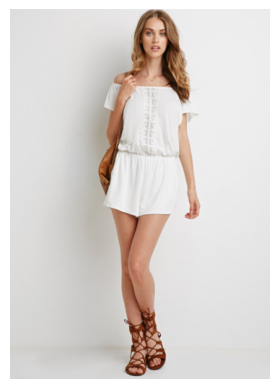

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
TEXT:
The lady wears a short-sleeve T-shirt with graphic patterns and three-point shorts. The T-shirt is with cotton fabric. The shorts are with cotton fabric and solid color patterns. This female is wearing a ring on her finger. This lady has neckwear.
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
Example 2
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
IMAGE:



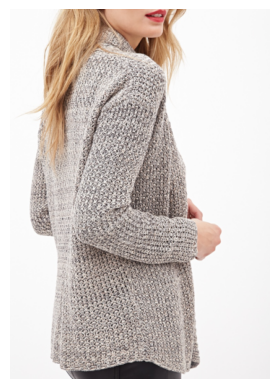

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
TEXT:
The sweater this female wears has long sleeves and its fabric is other. The pattern of it is other. The outer clothing is with knitting fabric and solid color patterns.


In [59]:
visualize_eval_examples(eval_batch)